__Alejandro Gonzalez Garcia__
<br>
Date: Mar. 7, 2022
<br>
PHYS 2030 W22

# <center><font color=#46769B>Exercise 21: Kapitza's pendulum</font></center>

## <font color=#46769B>Introduction</font>

The goals of this exercise are:
- Gain further experience with RK4 methods for solving ODEs
- Study a system of ODEs with interesting behavior

Required reading:
- *Lesson 10: Second-order methods*


## <font color=#46769B>Exercise</font>

Kapitza's pendulum is a pendulum in which the pivot is attached to a motor that causes the pivot to move up and down. 

<div>
<img src="https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/raw/main/figures/KapitzaPendulumScheme.gif" width="240">
</div>

We assume that the vertical motion of the pivot is periodic, described by

$$y(t) = A \, \cos(\nu t)$$

where $A$ is the amplitude and $\nu$ is the angular frequency of the pivot's motion up and down. Recalling that the formula for torque is $\tau = F \ell \sin(\theta)$, where $F = m y''(t)$ is the force due to the pivot's motion on the pendulum arm and $\theta$ is the relative angle between the pendulum and the vertical, we arrive an equation of motion:

$$\theta''(t) + \omega^2 \sin(\theta(t)) + A \nu^2 \cos(\nu t) \sin(\theta(t)) = 0\, . \qquad (1)$$

The usual simple pendulum (recoved by setting $A=0$ above) has two equilibrium positions:
- Stable equilibrium point at $\theta=0$ (hanging straight down). A small push away from $\theta=0$ will lead to small oscillations around the point $\theta=0$.
- Unstable equilibrium point at $\theta = \pi$ (pointing straight up). An arbitrarily small push away from $\theta=\pi$ will lead to a large displacement.

The unusual feature of Kapitsa's pendulum is that a rapid driving force can cause the unstable point at $\theta=\pi$ *to become stable*. Here are one [video](https://www.youtube.com/watch?v=cjGqxF79ITI) and another [video](https://www.youtube.com/watch?v=GgYABmG_bto) that illustrate this phenomenon in action. (Some further links for the interested reader are [here](https://gereshes.com/2019/02/25/kapitzas-pendulum/) and [here](https://en.wikipedia.org/wiki/Kapitza%27s_pendulum).)

## <font color=#46769B>Part (a)</font>

Consider the following parameters:

$$\omega = 2\pi , \quad A = 0.1, \quad \nu = 100$$

Your tasks are as follows:
- Write a code to solve Kapitza's pendulum for the initial condition
$$ \theta(0) = 3, \quad \theta'(0) = 0 \, .$$
over the time interval $[0,10]$. Use the RK4 method (described in Lesson 10) to solve Eq. (1). Your results should do the convergence checking step, until your code has converged to within a tolerance of `atol=rtol=1e-2`.
- Make a plot showing $\theta(t)$ vs $t$ for Kapitsa's pendulum. Show also in the same plot, $\theta(t)$ vs $t$ for the simple pendulum with the same initial condition. What is your conclusion about whether $\theta=\pi$ is stable or unstable?
- Make a plot of $\theta'(t)$ vs $\theta(t)$ for both Kapitsa's pendulum and the simple pendulum. 

This latter type of plot is known as a __phase portrait__, which is nice way to visualize both position and velocity of a trajectory. It is easy to implement from your numerical solutions. Suppose your solutions are saved in a `numpy.array` named `y`, which has size $(N+1) \times 2$. Then you simply do:
```py
theta = y[:,0]
theta_prime = y[:,1]
plt.plot(theta,theta_prime)
```
since recall $\mathbf{y} = (\theta,\theta^\prime)$.

Feel free to use `scipy.integrate.solve_ivp` to check your numerical results, but it is not mandatory.



Trying 2000 steps
Trying 4000 steps
Trying 8000 steps
solution converges after 8000 steps


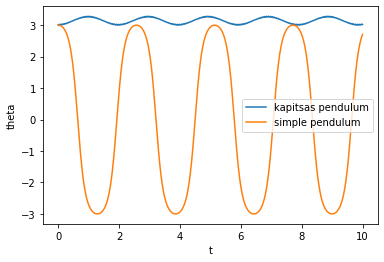

clearly kapitsas pendulum is stable at what seems to be theta = pi
theta = pi is when the pendulum is upright, which demonstrates the phenomenon discussed


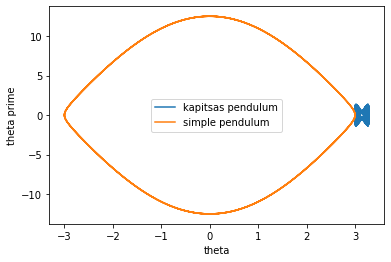

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp 

omega = 2*np.pi
A = 0.1 
nu = 100
t0, tf = 0,10
theta0 = 3 

def f(t,y):
  y1, y2 = y 
  return np.array([y2, -omega**2 * np.sin(y1) + A * nu**2 * np.cos(nu*t) * np.sin(y1)])

def rk4(num_steps,theta_0):

  t = np.linspace(t0,tf,num=num_steps+1)
  h = t[1]-t[0]

  y = np.zeros((num_steps+1,2))
  y0 = np.array([theta_0,0])
  y[0] = y0 

  for i in range(num_steps):
    ti = t[i] 
    yi = y[i]
    k1 = f(ti,yi)
    k2 = f(ti + h/2, yi + (h/2)*k1)
    k3 = f(ti + h/2, yi + (h/2)*k2)
    k4 = f(ti + h, yi + h*k3)
    k = (k1 + 2*k2 + 2*k3 + k4) / 6 
    y[i+1] = yi + h*k
  return t, y  

not_converged_yet = True
num_steps = 1000

t_old, y_old = rk4(num_steps,theta0)

while not_converged_yet:
  num_steps = 2*num_steps
  print('Trying %d steps' % num_steps)
  t_new, y_new = rk4(num_steps,theta0)
  not_converged_yet = not(np.allclose(y_old,y_new[::2],atol=1e-2,rtol=1e-2))
  y_old = y_new

print('solution converges after %d steps' % num_steps)

theta1 = y_new[:,0]
plt.plot(t_new,theta1,label='kapitsas pendulum')
plt.ylabel('theta')
plt.xlabel('t')
plt.legend()

# simple pendulum

def f1(t,y):
  y1,y2 = y 
  return np.array([y2, -omega**2 * np.sin(y1)])

def rk4_simple(num_steps,theta_0):

  t = np.linspace(t0,tf,num=num_steps+1)
  h = t[1]-t[0]

  y = np.zeros((num_steps+1,2))
  y0 = np.array([theta_0,0])
  y[0] = y0 

  for i in range(num_steps):
    ti = t[i] 
    yi = y[i]
    k1 = f1(ti,yi)
    k2 = f1(ti + h/2, yi + (h/2)*k1)
    k3 = f1(ti + h/2, yi + (h/2)*k2)
    k4 = f1(ti + h, yi + h*k3)
    k = (k1 + 2*k2 + 2*k3 + k4) / 6 
    y[i+1] = yi + h*k
  return t, y

t, y = rk4_simple(num_steps,theta0)

plt.plot(t,y[:,0],label='simple pendulum')
plt.legend()
plt.show()
print('clearly kapitsas pendulum is stable at what seems to be theta = pi')
print('theta = pi is when the pendulum is upright, which demonstrates the phenomenon discussed')

# plot phase portraits 
theta2 = y[:,0]

theta_prime1 = y_new[:,1]
theta_prime2 = y[:,1]

plt.plot(theta1,theta_prime1,label='kapitsas pendulum')
plt.plot(theta2,theta_prime2,label='simple pendulum')
plt.xlabel('theta')
plt.ylabel('theta prime')
plt.legend()
plt.show()


## <font color=#46769B>Part (b)</font>

Now modify Kapitza's pendulum by including a damping term:

$$\theta''(t) + \gamma \theta'(t) + \omega^2 \sin(\theta(t)) + A \nu^2 \cos(\nu t) \sin(\theta(t)) = 0\, . \qquad (2)$$

with the same $t$ interval $[0,10]$ and initial condition 

$$ \theta(0) = 3, \quad \theta'(0) = 0 \, .$$

For a simple pendulum, changing the damping $\gamma$ does not affect where the equilibrium points are, but simple affects how the solution relaxes to there. Here, for Kapitza's pendulum, the situation is much more complex, as you will see.

Repeat the activities in Part (a) for various values of $\gamma$, taking them from `numpy.linspace(0.1,1,num=10)`, and solving Eq. (2) using the RK4 method.
- For each value of $\gamma$, solve for $\theta(t)$ using RK4, ensuring your results have converged as in Part (a).
- Make one plot showing $\theta(t)$ vs $t$ for Kapitsa's pendulum for all values of $\gamma$. (You can divide it up in two or more plots if it looks too busy.)
- Make one plot showing the phase portraits for all values of $\gamma$. (Again, feel free to break it into multiple plots if it looks too busy.) 
- Discuss qualitatively what you found, i.e., how the apparent equilibrium position varies as a function of $\gamma$.

Feel free to use `scipy.integrate.solve_ivp` to check your numerical results, but it is not mandatory. Note if you do use `solve_ivp`, it may be useful to increase the tolerance settings by adding thse keywords, e.g., `atol=1e-10, rtol=1e-10`.



solution for gamma = 0.1 converges after 8000 steps


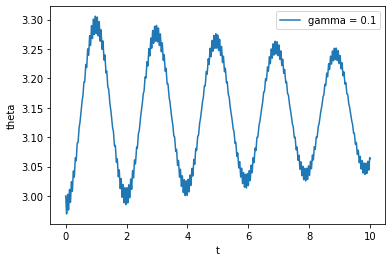

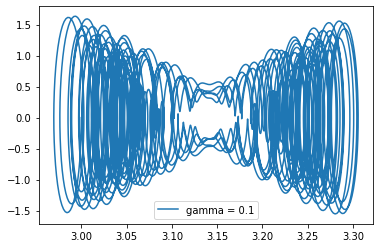

solution for gamma = 0.2 converges after 8000 steps


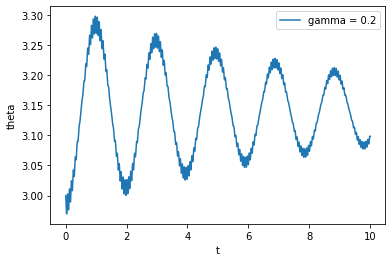

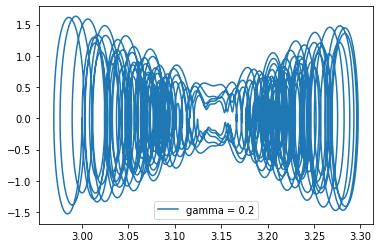

solution for gamma = 0.3 converges after 8000 steps


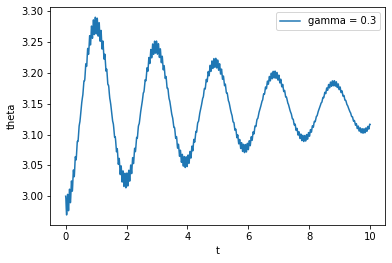

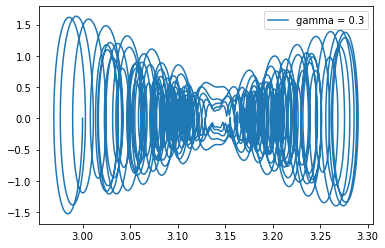

solution for gamma = 0.4 converges after 4000 steps


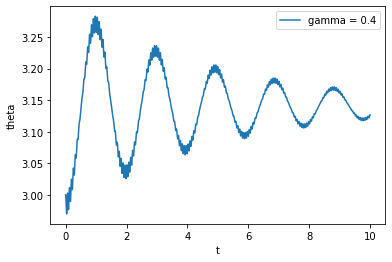

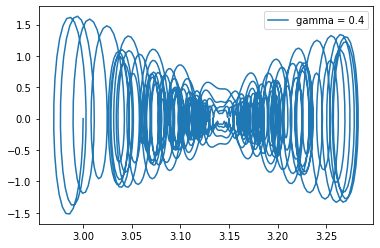

solution for gamma = 0.5 converges after 4000 steps


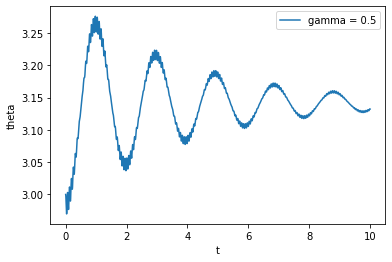

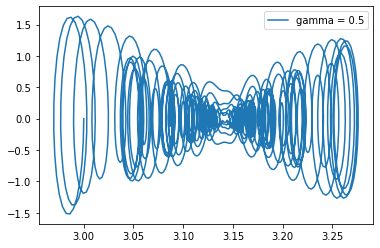

solution for gamma = 0.6 converges after 4000 steps


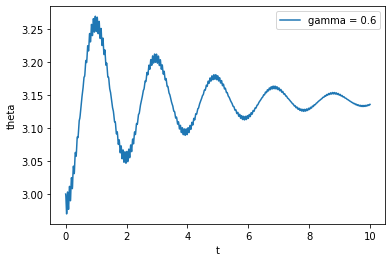

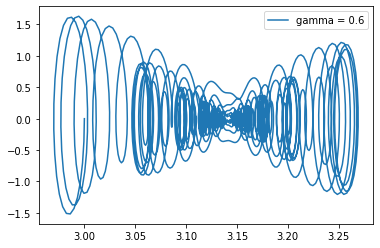

solution for gamma = 0.7 converges after 4000 steps


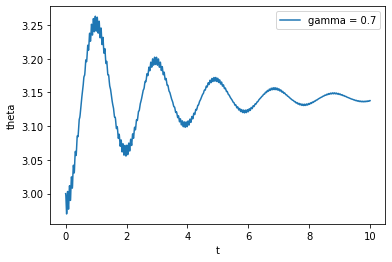

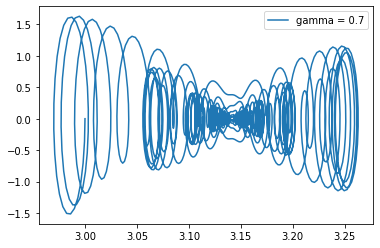

solution for gamma = 0.8 converges after 4000 steps


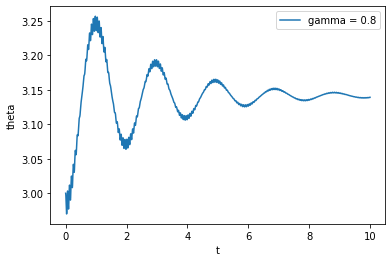

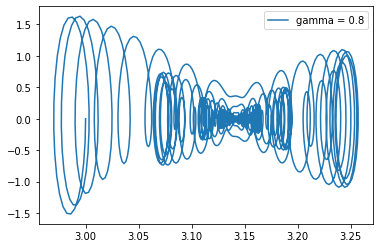

solution for gamma = 0.9 converges after 4000 steps


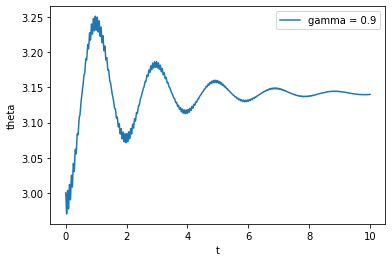

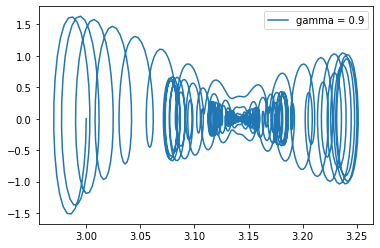

solution for gamma = 1.0 converges after 4000 steps


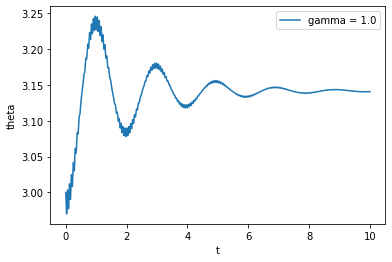

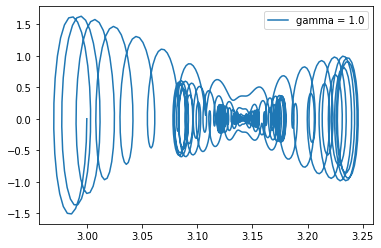

In [2]:
gamma = np.linspace(0.1,1,num=10)

def f(t,y):
    y1,y2 = y
    return np.array([y2, -gamma[i]*y2 - omega**2*np.sin(y1)-A*nu**2*np.cos(nu*t)*np.sin(y1)])
  
def rk4(num_steps,theta_0):

  t = np.linspace(t0,tf,num=num_steps+1)
  h = t[1]-t[0]

  y = np.zeros((num_steps+1,2))
  y0 = np.array([theta_0,0])
  y[0] = y0 

  for i in range(num_steps):
    ti = t[i] 
    yi = y[i]
    k1 = f(ti,yi)
    k2 = f(ti + h/2, yi + (h/2)*k1)
    k3 = f(ti + h/2, yi + (h/2)*k2)
    k4 = f(ti + h, yi + h*k3)
    k = (k1 + 2*k2 + 2*k3 + k4) / 6 
    y[i+1] = yi + h*k
  return t, y  

for i in range(len(gamma)):

  not_converged_yet = True
  num_steps = 1000

  t_old, y_old = rk4(num_steps,theta0)

  while not_converged_yet:
    num_steps = 2*num_steps
    t_new, y_new = rk4(num_steps,theta0)
    not_converged_yet = not(np.allclose(y_old,y_new[::2],atol=1e-2,rtol=1e-2))
    y_old = y_new

  print('solution for gamma = %.1f converges after %d steps' %(gamma[i],num_steps))

  theta = y_new[:,0]
  plt.plot(t_new,theta,label='gamma = %.1f' %gamma[i])
  plt.ylabel('theta')
  plt.xlabel('t')
  plt.legend()
  plt.show()

  theta_prime = y_new[:,1]
  plt.plot(theta,theta_prime,label = 'gamma = %0.1f' %gamma[i]) 
  plt.legend()
  plt.show()